In [ ]:
import os
from math import atan
import matplotlib.pyplot as plt

In [ ]:
# Create theoretical and measured waypoint data

# final experimental sequece: 
    # forward 2 meters at speed 150
    # turn -1.5 rotations at speed 150
    # forward 5 meters at speed 150
    # turn -2.5 rotations at speed 150
    # forward 150 at speed 150
    # turn -8 rotations at speed 100
    # forward 4 meters at speed 50
theoretical_waypoints_true = (
    # in units of [cm], [cm], [rotations]
    (0, 0, 0),
    (200, 0, 0),
    (200, 0, -1.5),
    (-300, 0, -1.5),
    (-300, 0, -4),
    (-150, 0, -4),
    (-150, 0, -12),
    (250, 0, -12)
)

theoretical_waypoints = (
    # in units of [cm], [cm], [rotations]
    (0, 0, 0),
    (200, 3, 0),
    (-300, 6, -1.5),
    (-150, 9, -4),
    (250, 12, -12)
)

measured_waypoints_inches = (
    # in units of [in], [in]
    (0, 0, 0),
    (32.4, -2.4),
    #(32.4, -2.4),
    (-0.9, -75.4),
    #(-0.9, -75.4),
    (20.3, -70.3),
    #(20.3, -70.3),
    (-67.5, 37.5)
)

measured_waypoints = tuple(
    # in units of [cm], [cm]
    (
        point[0] * 2.54,  # inches to cm
        point[1] * 2.54,  # inches to cm
    ) for point in measured_waypoints_inches
)

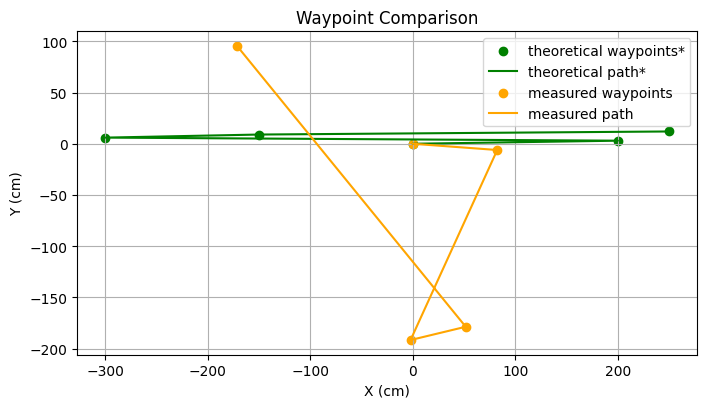

In [44]:
# Plot theoretical and observed waypoint data

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect('equal')

# Extract x and y coordinates from theoretical waypoints
theoretical_x = [point[0] for point in theoretical_waypoints]
theoretical_y = [point[1] for point in theoretical_waypoints]

# Extract x and y coordinates from measured waypoints
measured_x = [point[0] for point in measured_waypoints]
measured_y = [point[1] for point in measured_waypoints]

# Plot theoretical waypoints
ax.scatter(theoretical_x, theoretical_y, color='green', label='theoretical waypoints*')
ax.plot(theoretical_x, theoretical_y, color='green', label='theoretical path*')

# Plot measured waypoints
ax.scatter(measured_x, measured_y, color='orange', label='measured waypoints')
ax.plot(measured_x, measured_y, color='orange', label='measured path')

# Set labels and title
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_title('Waypoint Comparison')

ax.legend()
ax.grid(True)

plt.show()

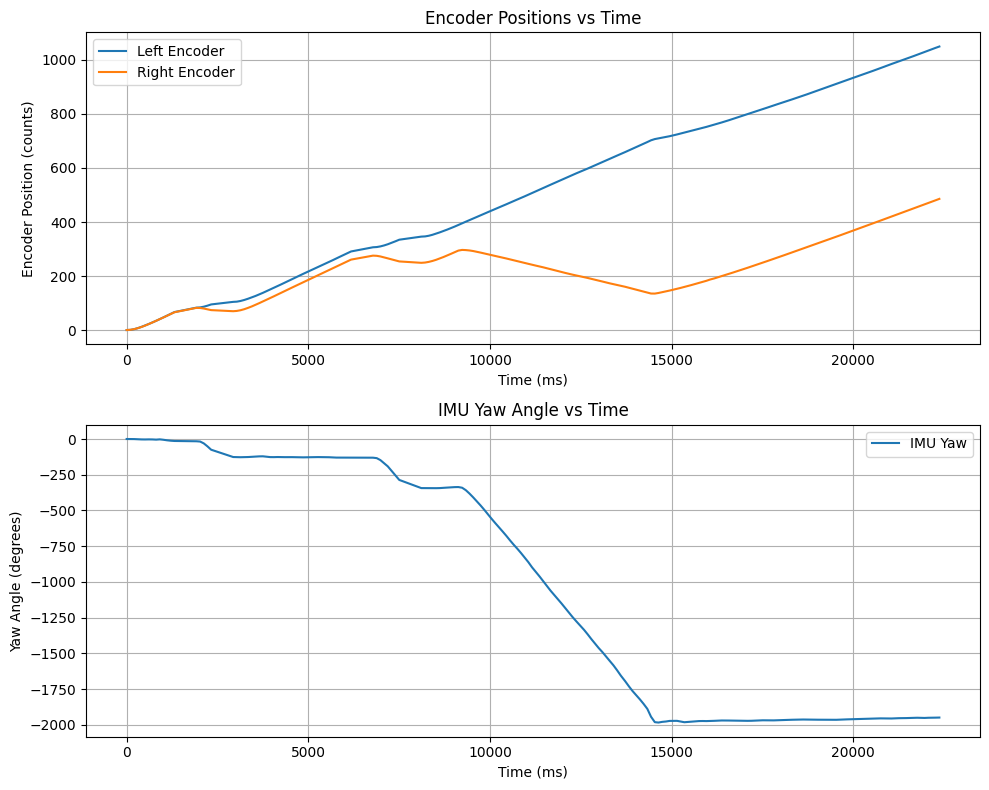

In [37]:
# Plot RAW data from l4data_final.csv

data_path = os.path.join(os.getcwd(), 'l4data_final.csv')

with open(data_path, 'r') as f:
    data = f.readlines()

# Parse the CSV data into lists
times = []
left_positions = []
right_positions = [] 
yaws = []

for line in data:
    t, l, r, y = line.strip().split(',')
    times.append(float(t))
    left_positions.append(float(l))
    right_positions.append(float(r))
    yaws.append(float(y))

# Create subplots
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

# Plot encoder positions
ax1.plot(times, left_positions, label='Left Encoder')
ax1.plot(times, right_positions, label='Right Encoder')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Encoder Position (counts)')
ax1.legend()
ax1.grid(True)
ax1.set_title('Encoder Positions vs Time')

# Plot IMU yaw angle
ax2.plot(times, yaws, label='IMU Yaw')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Yaw Angle (degrees)')
ax2.legend()
ax2.grid(True)
ax2.set_title('IMU Yaw Angle vs Time')

plt.tight_layout()
plt.show()

